# Init

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
print("CURRENT FOLDER:")
%pwd

CURRENT FOLDER:


'c:\\max\\Google Drive Max\\Max Shared\\Master Data Science\\2020-05 Capstone A\\msds_capstone\\analysis\\fullRuns'

In [5]:
import os
import glob
import pandas as pd
import sys
import numpy as np
import plotly.graph_objects as go 
import plotly.offline as py 
from plotly.subplots import make_subplots
import re
sys.path.append(os.environ['DEV_AUTOTS'])
sys.path.append(os.environ['CAPSTONE_PYTHON_SOURCE'])
# folder = os.environ['CAPSTONE_DATA']

# Functions

In [15]:
def readData(prodCat):
    files=glob.glob("full_models*"+prodCat+"*.pkl")
    data=pd.DataFrame()
    for f in files:
        t=pd.read_pickle(f)
        t['RunProds'] = int(re.search('Prod(\d+)', f)[1])
        t['RunSims'] = int(re.search('Sim(\d+)', f)[1])
        t['RunPeriods'] = re.search('Per(\d+)', f)[1]
        data=data.append(t)
    data=data[data['RunProds'] <= 6]
    return(data)

def getRMSE(data):
    print("Num Products:",data['RunProds'].unique())
    RMSE = (data.groupby(['Chain Master','RunProds','RunSims'])
            .apply(lambda x: pd.Series({
                'Naive':np.mean(x['Naive Best RMSE'])
                ,'P0':np.mean(x['P0 Best Model RMSE'])
                ,'P0Sim':np.mean(x['P0+Sim Best Model RMSE'])
            }))
            .reset_index()
            .pipe(lambda x: x[x['Chain Master']==''])
            .sort_values(['RunProds','RunSims'])
            .assign(Imp_P0_Naive=lambda x:-(x['P0'] / x['Naive']-1)
                    ,Imp_P0Sim_Naive=lambda x:-(x['P0Sim'] / x['Naive']-1)
                    ,Imp_P0Sim_P0=lambda x:-(x['P0Sim'] / x['P0']-1))

           )
    return(RMSE)

def getPlot(RMSE):
    #to show ploty in jupyter lab
    #https://plotly.com/python/getting-started/#jupyterlab-support-python-35
    import plotly.express as px
    fig = go.Figure()
    colors = px.colors.sequential.Greens
    colorsB = px.colors.sequential.Blues
    #for p in RMSE.RunProds.unique():
    #adding P0 vs Naive
    t=RMSE[RMSE['RunSims']==1]
    #fig.add_trace(go.Bar(x=t['RunProds'],y=t['Imp_P0_Naive'],name='Without Cross Effect'))
    fig.add_trace(go.Scatter(x=t['RunProds'],y=t['Imp_P0_Naive'],name='Without Cross Effect'
                             ,mode='markers+lines+text',textposition='middle left'
                             ,text= ["Without cross effect"]+['']*(t.shape[1]-1)
                             ,textfont_size = 16
                             ,line=dict(color=colorsB[3],width=5)
                            ))
    
    for s in RMSE.RunSims.unique():
        t=RMSE[RMSE['RunSims']==s]
        fig.add_trace(go.Scatter(x=t['RunProds'],y=t['Imp_P0Sim_Naive'],name='With ' + str(s) + ' Cross Effect'
                                 ,mode='markers+lines+text',textposition='middle left'
                                 ,text= [str(s) + " cross effect(s)"]+['']*(t.shape[1]-1)
                                 ,textfont_size = 16
                                 ,line=dict(color=colors[s+2],width=5)
                                ))
    
    #Layout
    fig.update_layout(autosize=False,width=1200,height=600
                      ,template='simple_white'
                      ,showlegend=False
                      ,title = dict(text="RMSE Improvement Across Models",xanchor='center',x=0.5
                                    ,font=dict(size=26))
                      ,yaxis = dict(title="RMSE Improvement Over Naive", titlefont=dict(size=20)
                                    ,tickformat = ",.0%",tickfont = dict(size=15)
                                    ,range=[0,.4]
                                   )
                      ,xaxis = dict(title="Number of 'Top' Products", titlefont=dict(size=20)
                                    ,tickfont = dict(size=15)
                                    , range=[min(RMSE['RunProds'])-0.7,max(RMSE['RunProds'])+0.5]
                                                 ,tickvals = RMSE['RunProds'].unique())
                     )

    #py.plot(fig)
    fig.show()  
    return(fig)

def runAll(prodCat):
    data=readData(prodCat)
    RMSE=getRMSE(data)
    plot=getPlot(RMSE)
    return(data,RMSE,plot)




# Whiskey

Num Products: [3 4 5 6]


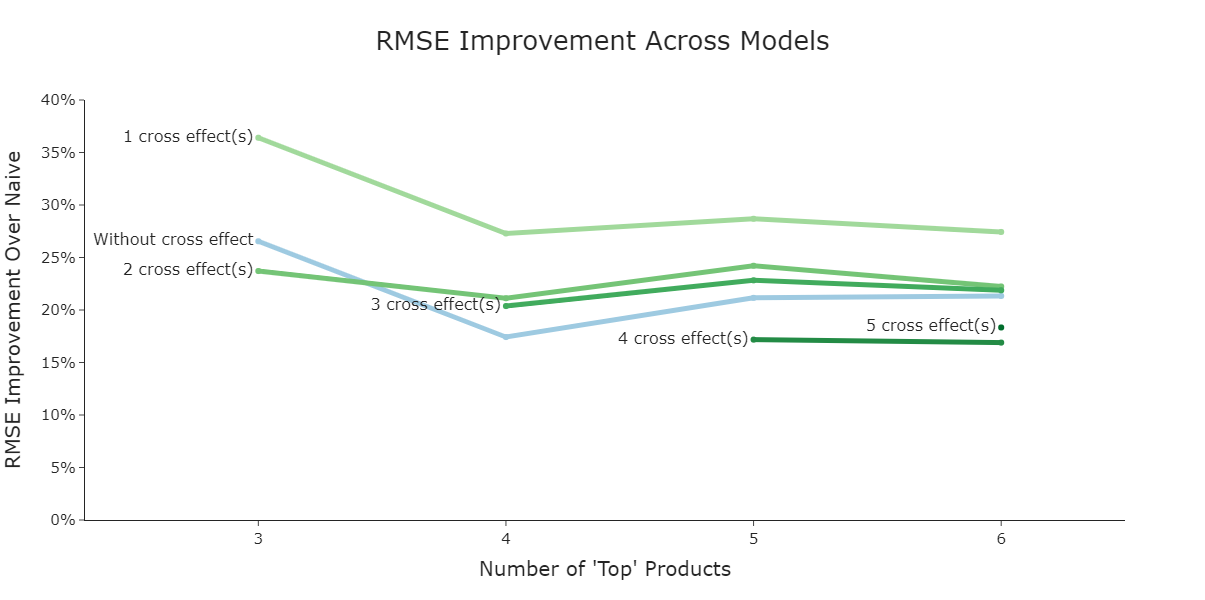

In [16]:
whiskey = runAll("WHISKEY")

In [11]:
whiskey[1]

,Chain Master,RunProds,RunSims,Naive,P0,P0Sim,Imp_P0_Naive,Imp_P0Sim_Naive,Imp_P0Sim_P0
0,,3,1,0.248941,0.182860,0.158305,0.265448,0.364085,0.134281
1,,3,2,0.248941,0.182860,0.189912,0.265448,0.237120,-0.038566
2,,4,1,0.361355,0.298390,0.262750,0.174248,0.272877,0.119440
3,,4,2,0.361355,0.298390,0.285038,0.174248,0.211198,0.044747
4,,4,3,0.361355,0.298390,0.287726,0.174248,0.203758,0.035737
5,,5,1,0.374252,0.295079,0.266893,0.211550,0.286864,0.095521
6,,5,2,0.374252,0.295079,0.283635,0.211550,0.242128,0.038782
7,,5,3,0.374252,0.295079,0.288830,0.211550,0.228249,0.021179
8,,5,4,0.374252,0.295079,0.309954,0.211550,0.171805,-0.050410
9,,6,1,0.362162,0.284884,0.262809,0.213379,0.274334,0.077489


In [13]:
whiskey[0][whiskey[0]['Chain Master']==""]

,Chain Master,Product,Period to Last,White Noise,Naive Best Type,Naive Best RMSE,P0 Best Model Name,P0 Best Model RMSE,P0+Sim Best Model Name,P0+Sim Best Model RMSE,RunProds,RunSims,RunPeriods
1,,JACK DANIELS BLK WHSKY 1.75L,1,False,last,0.324455,auto_SARIMAX,0.243913,auto_SARIMAX,0.183695,3,1,123
4,,JACK DANIELS BLK WHSKY 1.75L,2,False,mean,0.323943,auto_SARIMAX,0.219089,auto_SARIMAX,0.161965,3,1,123
7,,JACK DANIELS BLK WHSKY 1.75L,3,False,mean,0.319180,auto_SARIMAX,0.231060,auto_SARIMAX,0.188390,3,1,123
0,,JACK DANIELS BLK WHSKY 1L,1,True,mean,0.043169,SARIMAX,0.028845,SARIMAX,0.028235,3,1,123
3,,JACK DANIELS BLK WHSKY 1L,2,True,mean,0.021557,ML,0.034618,ML,0.030985,3,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,,JACK DANIELS BLK WHSKY SQ 375M,2,False,mean,0.669609,ML,0.678531,ML,0.723988,6,5,123
15,,JACK DANIELS BLK WHSKY SQ 375M,3,False,mean,0.627867,auto_SARIMAX,0.631077,SARIMAX,0.635462,6,5,123
5,,JACK DANIELS TENN HNY WHSKY 750M,1,False,mean,0.331289,ML,0.228615,ML,0.252209,6,5,123
11,,JACK DANIELS TENN HNY WHSKY 750M,2,False,mean,0.292008,auto_SARIMAX,0.226799,ML,0.279772,6,5,123


# Vodka

Num Products: [3 4 5 6]


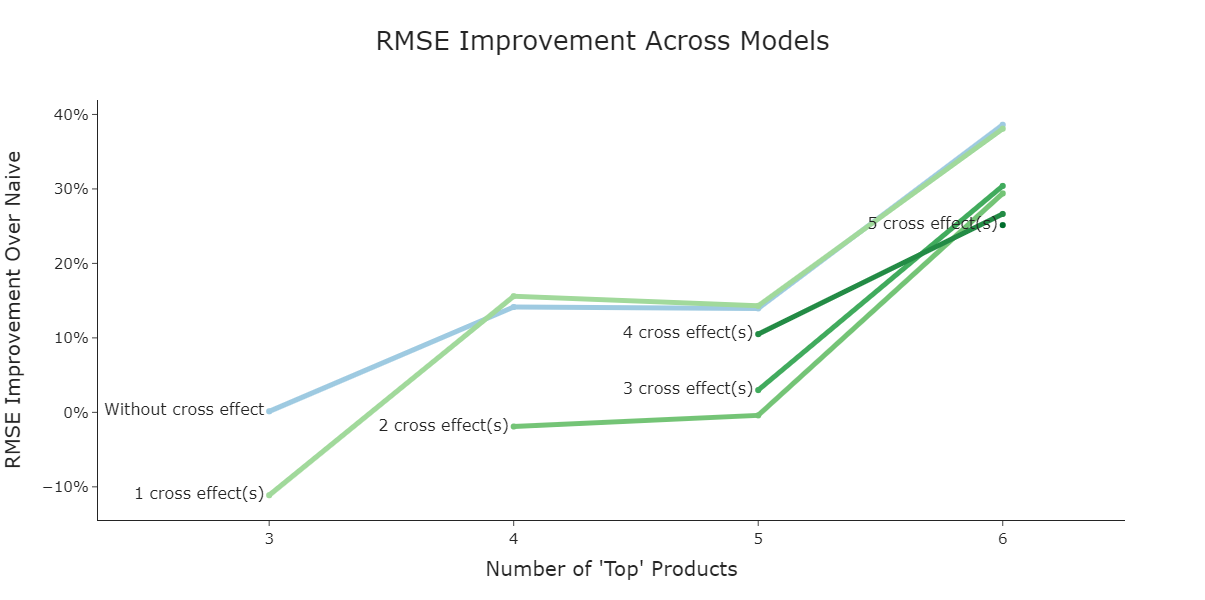

In [6]:
vodka = runAll("VODKA")